<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/chap5_catsNdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train' 
base_dir ='./datasets/cats_and_dogs_small'
os.mkdir(base_dir)

In [0]:
#훈련, 검증, 테스트 분할을 위한 디렉토리

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir =os.path.join(base_dir, 'vadlidation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
#훈련용 사진 디렉토리

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [0]:
#검증용 사진 디렉토리

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [0]:
#테스트용 사진 디렉토리

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
#처음 1000개의 고양이 이미지를 train_cats_dir에 복사

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
#다음 500개의 고양이 이미지를 validation_cats_dir에 복사

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
#다음 500개의 고양이 이미지를 test_cats_dir에 복사

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
#처음 1000개의 강아지 이미지를 train_dogs_dir에 복사

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
#다음 500개의 강아지 이미지를 validation_dogs_dir에 복사

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
#다음 500개의 강아지 이미지를 test_dogs_dir에 복사

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [12]:
print("훈련용 고양이 이미지 전체 개수 : ", len(os.listdir(train_cats_dir)))
print("검증용 고양이 이미지 전체 개수 : ", len(os.listdir(validation_cats_dir)))
print("테스트용 고양이 이미지 전체 개수 : ", len(os.listdir(test_cats_dir)))

print("훈련용 강아지 이미지 전체 개수 : ", len(os.listdir(train_dogs_dir)))
print("검증용 강아지 이미지 전체 개수 : ", len(os.listdir(validation_dogs_dir)))
print("테스트용 강아지 이미지 전체 개수 : ", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 :  1000
검증용 고양이 이미지 전체 개수 :  500
테스트용 고양이 이미지 전체 개수 :  500
훈련용 강아지 이미지 전체 개수 :  1000
검증용 강아지 이미지 전체 개수 :  500
테스트용 강아지 이미지 전체 개수 :  500


In [13]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

Using TensorFlow backend.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr =1e-4),
             metrics =['acc'])

In [16]:
#ImageDataGenerator : 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동 변환시켜주는 python genertor를 만들어줌 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit_generator(train_generator,
                             steps_per_epoch =100,
                             epochs = 30,
                             validation_data = validation_generator,
                              validation_steps=50)   # validation_generator의 배치 사이즈가 20으로 전체 검증 데이터 1000개를 사용하려면 50steps

Epoch 1/30
100/100 [==============================] - 165s 2s/step - loss: 0.6893 - acc: 0.5405 - val_loss: 0.6760 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 166s 2s/step - loss: 0.6571 - acc: 0.6280 - val_loss: 0.6617 - val_acc: 0.5860
Epoch 3/30
100/100 [==============================] - 163s 2s/step - loss: 0.6021 - acc: 0.6760 - val_loss: 0.6809 - val_acc: 0.5990
Epoch 4/30
100/100 [==============================] - 165s 2s/step - loss: 0.5618 - acc: 0.7155 - val_loss: 0.6797 - val_acc: 0.6240
Epoch 5/30
100/100 [==============================] - 164s 2s/step - loss: 0.5287 - acc: 0.7450 - val_loss: 0.5689 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 165s 2s/step - loss: 0.4938 - acc: 0.7695 - val_loss: 0.6730 - val_acc: 0.6530
Epoch 7/30
100/100 [==============================] - 162s 2s/step - loss: 0.4637 - acc: 0.7760 - val_loss: 0.5654 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 165s 2s/step - 

In [0]:
model.save('cats_and_dogs_small_1.h5')

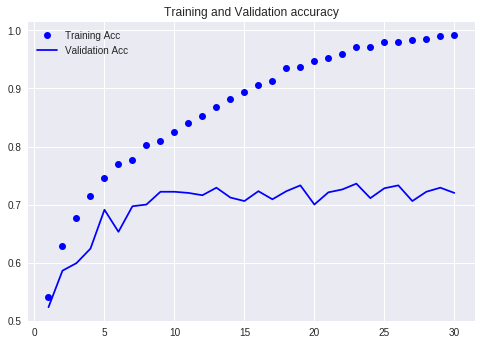

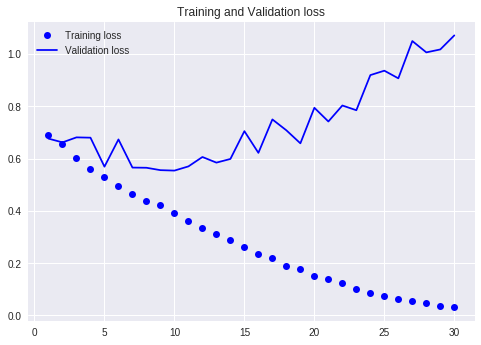

In [21]:
#훈련의 정확도와 손실 그래프 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss =history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label ='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
#데이터 증식을 통해 기존 샘플로부터 훈련데이터 생성 -> ImageDateGenerator 활용
dategen =ImageDataGenerator(rotation_range=20,
                           width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

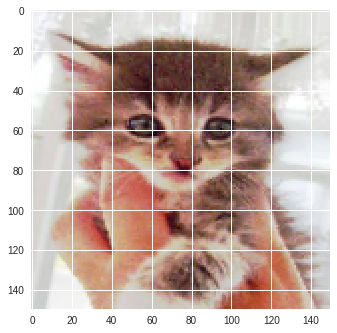

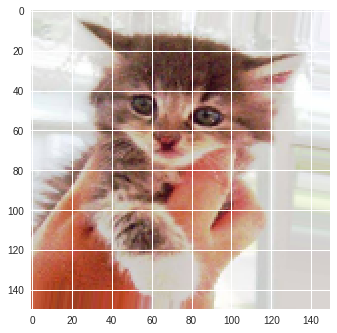

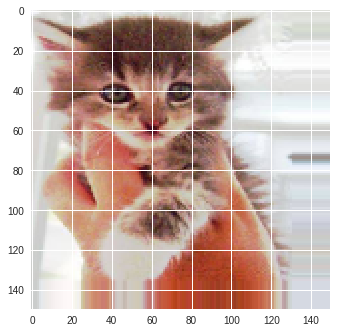

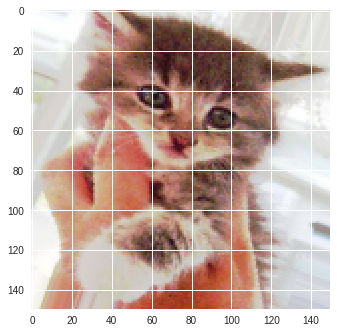

In [24]:
#랜덤하게 증식된 훈련 이미지

from keras.preprocessing import image

fnames = sorted ([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img =image.load_img(img_path, target_size =(150,150))

x =image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i=0
for batch in dategen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot =plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i %4 ==0 :
    break
plt.show()

In [0]:
#증식데이터를 사용하기 때문에 상호연관성이 높아 과대적합 문제가 발생할 수 있어 Dense 층 직전 Dropout층 추가하여 모델링

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [0]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr =1e-4),
             metrics =['acc'])

In [27]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)


test_datagen=ImageDataGenerator(rescale=1./255)  #검증데이터는 증식하면 안됨!


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150,150),
                                                       batch_size = 32,
                                                       class_mode = 'binary')

history = model.fit_generator(train_generator,
                             steps_per_epoch =100,
                             epochs = 100,
                             validation_data = validation_generator,
                              validation_steps=50) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 249s 2s/step - loss: 0.6937 - acc: 0.5228 - val_loss: 0.6790 - val_acc: 0.5876
Epoch 2/100
100/100 [==============================] - 242s 2s/step - loss: 0.6805 - acc: 0.5644 - val_loss: 0.6596 - val_acc: 0.5992
Epoch 3/100
100/100 [==============================] - 245s 2s/step - loss: 0.6707 - acc: 0.5897 - val_loss: 0.6562 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 245s 2s/step - loss: 0.6571 - acc: 0.6085 - val_loss: 0.6340 - val_acc: 0.6398
Epoch 5/100
100/100 [==============================] - 244s 2s/step - loss: 0.6353 - acc: 0.6278 - val_loss: 0.6835 - val_acc: 0.5635
Epoch 6/100
100/100 [==============================] - 242s 2s/step - loss: 0.6138 - acc: 0.6694 - val_loss: 0.6061 - val_acc: 0.6611
Epoch 7/100
100/100 [==============================] - 242s 2s/step - loss: 0.6086 - acc: 0.6600 - val_loss: 0.5

In [0]:
model.save('cats_and_dogs_small_2.h5')

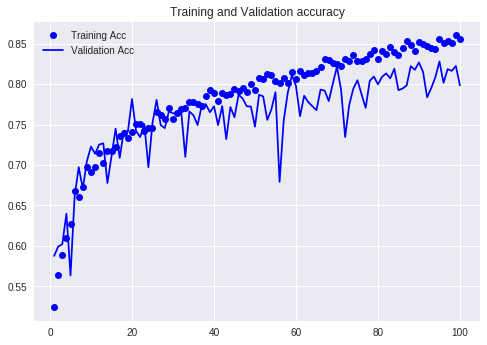

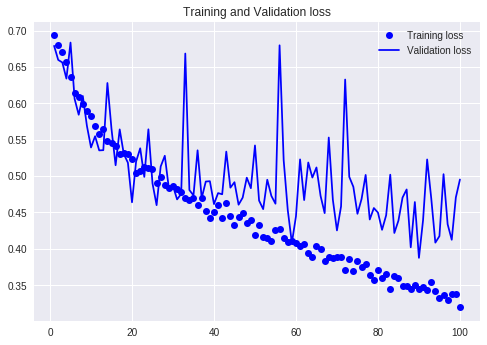

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss =history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label ='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()